In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [115]:
a = pd.read_csv('675uA_3500G.txt', skiprows = 1, delimiter= '\t',header = 1)
df = pd.DataFrame(a,columns = ['Temperature (K)','B-Field (Gauss)','sample current AB','sample current AD','sample current AC','sample current BD','sample current -AB','sample current -AD','sample current -AC','sample current -BD','Voltage CD','Voltage BC','Voltage BD','Voltage AC','Voltage -CD','Voltage -BC','Voltage -BD','Voltage -AC'])



vac,vbd = np.asarray(df['Voltage AC']),np.asarray(df['Voltage BD'])
cbd,cac = np.asarray(df['sample current BD']), np.asarray(df['sample current AC'] )
vcd,vbc = np.asarray(df['Voltage CD']),np.asarray(df['Voltage BC'])
cab,cad = np.asarray(df['sample current AB']), np.asarray(df['sample current AD'] )

B = np.asarray(df['B-Field (Gauss)']) * 1e-4
T = np.asarray(df['Temperature (K)'])

RH_roomtemp= []
Resistivity_roomtemp = []
zero_hallcoeff = []
hall_mobility = []
df

,Temperature (K),B-Field (Gauss),sample current AB,sample current AD,sample current AC,sample current BD,sample current -AB,sample current -AD,sample current -AC,sample current -BD,Voltage CD,Voltage BC,Voltage BD,Voltage AC,Voltage -CD,Voltage -BC,Voltage -BD,Voltage -AC
0,96.015,4176.000000,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.157641,0.205244,0.627509,0.566292,-0.159824,-0.207971,-0.629040,-0.565873
1,97.325,122.370003,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.110342,0.129735,0.024242,-0.013523,-0.112126,-0.131814,-0.024913,0.014175
2,98.635,-3984.000000,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000673,0.169828,0.186071,-0.562739,-0.627372,-0.171983,-0.188812,0.562285,0.626715
3,100.285,4177.000000,0.000675,0.000675,0.000675,0.000659,-0.000675,-0.000675,-0.000675,-0.000656,0.170435,0.220671,0.632712,0.552846,-0.172552,-0.223407,-0.634164,-0.549563
4,101.615,122.260002,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.120538,0.141903,0.026226,-0.015463,-0.122318,-0.143995,-0.026943,0.016126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,343.300,121.919998,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.011841,0.013477,0.001415,-0.001906,-0.012197,-0.013841,-0.001897,0.001462
164,344.800,-3958.000000,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.011482,0.013081,0.004263,0.001033,-0.011825,-0.013491,-0.004687,-0.001419
165,346.600,4156.000000,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.010720,0.012174,-0.001425,-0.004401,-0.011097,-0.012526,0.000884,0.003923
166,348.100,121.779999,0.000675,0.000675,0.000675,0.000675,-0.000675,-0.000675,-0.000675,-0.000675,0.009830,0.011184,0.001136,-0.001617,-0.010220,-0.011596,-0.001618,0.001190


In [116]:
#next

noB = (B[1:168:3])
posB = (B[0:168:3])
negB = (B[2:168:3])


vcd_noB = (vcd[1:168:3])
vcd_posB = (vcd[0:168:3])
vcd_negB = (vcd[2:168:3])


vbc_noB = (vbc[1:168:3])
vbc_posB = (vbc[0:168:3])
vbc_negB = (vbc[2:168:3])




cad_noB = (cad[1:168:3])
cad_posB = (cad[0:168:3])
cad_negB = (cad[2:168:3])


cab_noB = (cab[1:168:3])
cab_posB = (cab[0:168:3])
cab_negB = (cab[2:168:3])


T_noB = (T[1:168:3])
T_posB = (T[0:168:3])
T_negB = (T[2:168:3])
#ggg= negB
#print(np.mean(ggg),np.std(ggg))

In [117]:
def fitting(x, y):
    p, cov = np.polyfit(x, y, 1, cov=True)
    return p


In [118]:

noB = (B[1:168:3])
posB = (B[0:168:3])
negB = (-1*B[2:168:3])


vac_noB = (vac[1:168:3])
vac_posB = (vac[0:168:3])
vac_negB = (vac[2:168:3])




vbd_noB = (vbd[1:168:3])
vbd_posB = (vbd[0:168:3])
vbd_negB = (vbd[2:168:3])



cac_noB = (cac[1:168:3])
cac_posB = (cac[0:168:3])
cac_negB = (cac[2:168:3])


cbd_noB = (cbd[1:168:3])
cbd_posB = (cbd[0:168:3])
cbd_negB = (cbd[2:168:3])


T_noB = (T[1:168:3])
T_posB = (T[0:168:3])
T_negB = (T[2:168:3])



negB


T_extrinsic_pos

posB

 

array([0.4176, 0.4177, 0.4174, 0.4172, 0.4171, 0.4169, 0.4169, 0.4168,
       0.4167, 0.4167, 0.4165, 0.4165, 0.4165, 0.4164, 0.4163, 0.4164,
       0.4163, 0.4162, 0.4162, 0.4161, 0.4161, 0.416 , 0.416 , 0.416 ,
       0.4159, 0.4159, 0.4159, 0.4158, 0.4158, 0.4158, 0.4157, 0.4158,
       0.4157, 0.4158, 0.4157, 0.4158, 0.4158, 0.4158, 0.4157, 0.4157,
       0.4158, 0.4157, 0.4158, 0.4157, 0.4157, 0.4157, 0.4157, 0.4158,
       0.4156, 0.4157, 0.4157, 0.4157, 0.4157, 0.4157, 0.4156, 0.4156])

T_extrinsic_pos 269.4
T_intrinsic_pos 274.3
T_extrinsic_neg 272.4
T_intrinsic_neg 277.3


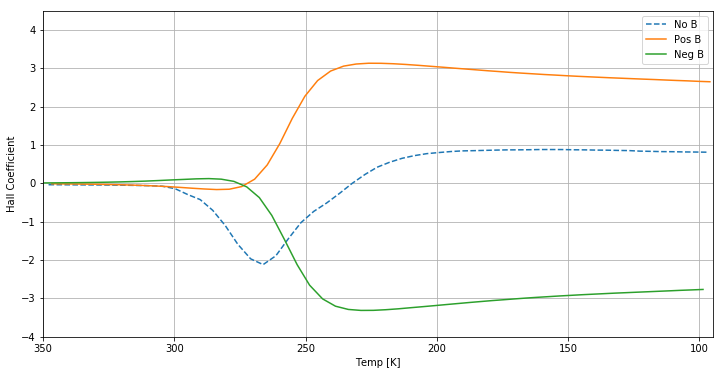

ff [274.3  279.05 283.85 288.65 293.4  298.2  303.   307.85 312.7  317.55
 322.4  327.25 332.1  336.95 341.75 346.6 ]


array([0.000675 , 0.000675 , 0.000675 , 0.000675 , 0.000675 , 0.000675 ,
       0.000675 , 0.000675 , 0.000668 , 0.0006212, 0.0005809, 0.0005429,
       0.0005086, 0.0004746, 0.0004468, 0.0004205, 0.0003961, 0.0003729,
       0.0003518, 0.0003329, 0.0003155, 0.0002989, 0.0002835, 0.0002692,
       0.0002556, 0.0002421, 0.0002297, 0.0002183, 0.0002079, 0.0001982,
       0.0001897, 0.000182 , 0.0001758, 0.0001718, 0.0001717, 0.0001777,
       0.0001927, 0.0002195, 0.0002615, 0.0003183, 0.000393 , 0.0004827,
       0.000595 , 0.000675 , 0.000675 , 0.000675 , 0.000675 , 0.000675 ,
       0.000675 , 0.000675 , 0.000675 , 0.000675 , 0.000675 , 0.000675 ,
       0.000675 , 0.000675 ])

In [119]:
def d(v1,i1,v2,i2,B):
    racbd = (v1/i1)
    rbdac = (v2/i2)
    trans_r = ((racbd+rbdac)/2)
    coeff = (trans_r)*(1.25e-3/B)
    return coeff
plt.figure(figsize=[12,6])
hallc_noB = d(vac_noB,cbd_noB,vbd_noB,cac_noB, noB)
      
T_extrinsic_pos = np.array(T_posB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)>0])
T_intrinsic_pos = np.array(T_posB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)<0])
T_extrinsic_neg = np.array(T_negB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)>0])
T_intrinsic_neg = np.array(T_negB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)<0])

print('T_extrinsic_pos',T_extrinsic_pos[-1])       
print('T_intrinsic_pos',T_intrinsic_pos[0])

print('T_extrinsic_neg',T_extrinsic_neg[-1])
print('T_intrinsic_neg',T_intrinsic_neg[0])

inversionpoint_posB = (T_intrinsic_pos[-1]+T_extrinsic_pos[0])/2
inversionpoint_negB = (T_intrinsic_neg[-1]+T_extrinsic_neg[0])/2

plt.plot(T_noB,hallc_noB,'--',label = 'No B')

hallc_posB = d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)
plt.plot(T_posB,hallc_posB,'-',label = 'Pos B')
hallc_negB = d(vac_negB,cbd_negB,vbd_negB,cac_negB, negB)





plt.plot(T_negB,hallc_negB,'-',label = 'Neg B')
plt.legend()
plt.xlabel('Temp [K]')
plt.ylabel('Hall Coefficient')
plt.xlim(350,95)
plt.ylim(-4,4.5)
plt.grid()
plt.show()
print('ff',T_intrinsic_pos)
cac_noB

50


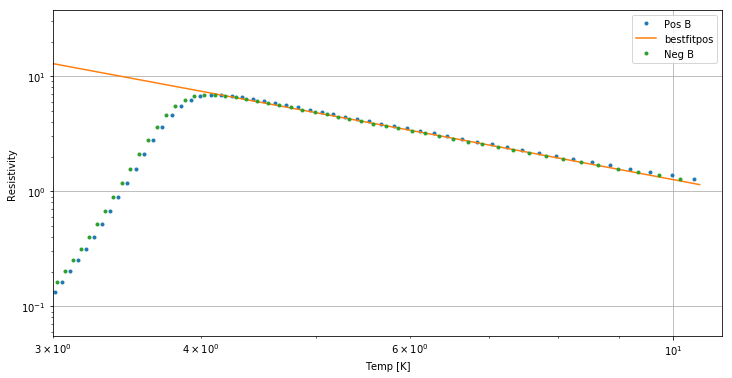

[ 96.015 100.285 104.515 108.78  113.005 117.17  121.375 125.535 129.635
 133.96  138.065 142.235 146.37  150.715 154.955 159.15  163.465 167.745
 172.05  176.35  180.48  184.75  189.03  193.305 197.565 202.3   207.05
 211.8   216.55  221.25  225.95  230.75  235.5   240.45  245.4   250.25
 255.05  259.8   264.6   269.4   274.3   279.05  283.85  288.65  293.4
 298.2   303.    307.85  312.7   317.55  322.4   327.25  332.1   336.95
 341.75  346.6  ]


In [120]:

def resistivity(v1,i1,v2,i2,B):
    const = np.pi*1.25e-3/np.log(2)
    racbd = (v1/i1)
    rbdac = (v2/i2)
    x = rbdac/racbd
    f = 1/np.cosh(np.log(abs(x)/2.403))
    trans_r = ((racbd+rbdac)/2)
    coeff = (trans_r)*(const)*f
    return coeff
plt.figure(figsize=[12,6])

resistivity_noB = resistivity(vcd_noB,cab_noB,vbc_noB,cad_noB, noB)
      

#plt.plot(T_noB,resistivity_noB,'v',label = 'No B')

resistivity_posB = resistivity(vcd_posB,cab_posB,vbc_posB,cad_posB, posB)
plt.plot(1000/T_posB,resistivity_posB,'.',label = 'Pos B')
#plt.yscale('log')
#plt.xscale('log')

resistivity_negB = resistivity(vcd_negB,cab_negB,vbc_negB,cad_negB, negB)
b = T_negB[0:34]
t = resistivity_posB[0:34]

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c
target_func = func_powerlaw


popt, pcov = curve_fit(target_func, b, t,maxfev=1000000 )


b = np.linspace(95,500)
plt.plot(1000/b, target_func(b, *popt), '-',label = 'bestfitpos')
print(len(b))
plt.yscale('log')


plt.xscale('log')


plt.plot(1000/T_negB,resistivity_posB,'.',label = 'Neg B')
plt.legend()
plt.xlabel('Temp [K]')
plt.ylabel('Resistivity')
plt.grid()
plt.xlim(3,11)
plt.show()
max_resisitivity = np.max(resistivity_posB)
print(T_posB)


#T_extrinsic_pos = np.array(T_negB[max_resisitivity>jj])

#d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB) hall coeff
#T_intrinsic_neg
tem = T_posB
resistiv = resistivity_posB
b = (T_posB[0:34])
t = (resistivity_posB[0:34])

#b = (T_negB[0:34])
#t = (jjj[0:34])
#plt.plot(1000/b,t)

In [121]:
"""e = 1.60217662e-19 #coulombs
resistivity_posB = d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)
plt.plot(T_posB,1/(e*hallc_posB),'-',label = 'Pos B')



resistivity_negB = d(vac_negB,cbd_negB,vbd_negB,cac_negB, negB)

plt.grid()
plt.plot(T_negB,1/(e*hallc_negB),'-',label = 'Neg B')

plt.legend()
j = 1/(e*hallc_posB)"""


"e = 1.60217662e-19 #coulombs\nresistivity_posB = d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)\nplt.plot(T_posB,1/(e*hallc_posB),'-',label = 'Pos B')\n\n\n\nresistivity_negB = d(vac_negB,cbd_negB,vbd_negB,cac_negB, negB)\n\nplt.grid()\nplt.plot(T_negB,1/(e*hallc_negB),'-',label = 'Neg B')\n\nplt.legend()\nj = 1/(e*hallc_posB)"

[1.27573829 1.37076758 1.46820092 1.57076984 1.67883739 1.78909724
 1.9057752  2.02584007 2.14978393 2.2840025  2.41773261 2.55777769
 2.70186802 2.85883548 3.01804008 3.17613469 3.34299135 3.5124169
 3.68971588 3.87687571 4.06037358 4.25638252 4.45501375 4.66234383
 4.86728999 5.10237671 5.3470261  5.58878436 5.83321933 6.07691781
 6.31107655 6.53177124 6.71611809 6.84322304 6.85765569 6.67127214
 6.22021612 5.4859379  4.56964359 3.62330029 2.76071339 2.08631541
 1.56800559 1.1815216  0.89733121 0.67436036 0.51554433 0.40164273
 0.31628175 0.25169064 0.20179179 0.1632186  0.13290767 0.10884686
 0.08963471 0.0742286 ]


/Users/yizelvizcarra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


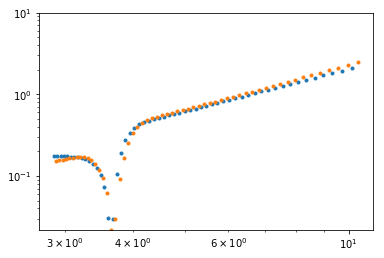

In [122]:
h = hallc_noB/resistivity_noB
h1 = hallc_posB/resistivity_posB
h2 = hallc_negB/resistivity_negB
plt.plot(1000/T_negB,abs(h1),'.')
plt.plot(1000/T_posB,abs(h2),'.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(-10,10)
print(resistivity_posB)

In [123]:
#next

noB = (B[1:168:3])
posB = (B[0:168:3])
negB = (B[2:168:3])


vcd_noB = (vcd[1:168:3])
vcd_posB = (vcd[0:168:3])
vcd_negB = (vcd[2:168:3])


vbc_noB = (vbc[1:168:3])
vbc_posB = (vbc[0:168:3])
vbc_negB = (vbc[2:168:3])




cad_noB = (cad[1:168:3])
cad_posB = (cad[0:168:3])
cad_negB = (cad[2:168:3])


cab_noB = (cab[1:168:3])
cab_posB = (cab[0:168:3])
cab_negB = (cab[2:168:3])


T_noB = (T[1:168:3])
T_posB = (T[0:168:3])
T_negB = (T[2:168:3])



In [124]:
mobility_noB = hallc_noB/resistivity_noB
mobility_posB = hallc_posB/resistivity_posB
mobility_negB = hallc_negB/resistivity_negB


hallmobility_neg =-1*mobility_negB[(T_negB < inversionpoint_negB)&(~np.isnan(mobility_negB)) ]
np.mean(hallmobility_neg)


hallmobility_pos =mobility_posB[(T_posB < inversionpoint_posB)&(~np.isnan(mobility_posB)) ]
print("The Hall Mobility at low temperatures for Positive B field is:",np.mean(hallmobility_pos))
print("The Hall Mobility at low temperatures for Negative B field is:",np.mean(hallmobility_neg))


The Hall Mobility at low temperatures for Positive B field is: 1.043426244259483
The Hall Mobility at low temperatures for Negative B field is: 1.1880320881257025


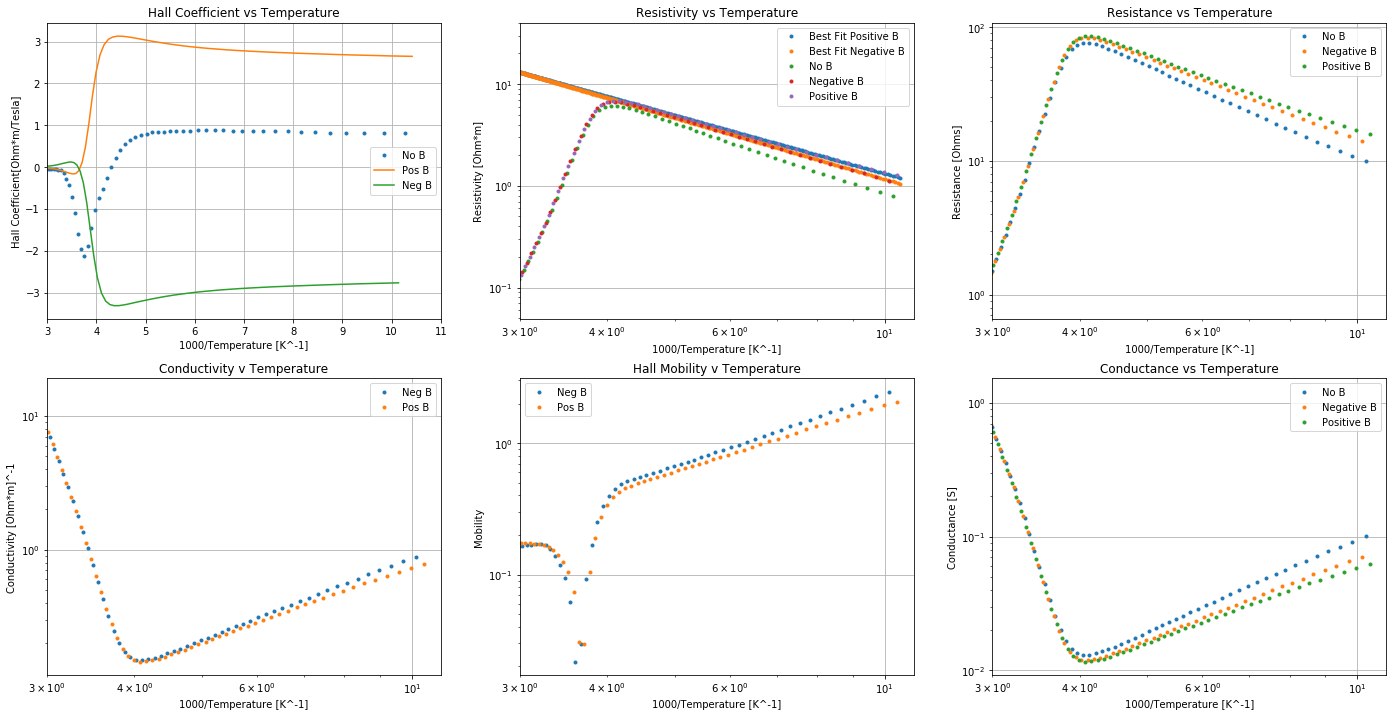

RH at Room temp of 295K with Positive B is: -0.11553600602294853
RH at Room temp of 295K with Negative B is: 0.10884575558696033
Resistivity at Room temp of 295K with Positive B is: 1.0167287151304154
Resistivity at Room temp of 295K with Negative B is: 1.0105229737086434
The Hall Coefficient is 0  for a Negative B field at: 224.1175
The Hall Coefficient is 0  for a Positive B field at: 221.3075
The Hall Mobility at low temperatures for Positive B field is: 1.043426244259483
The Hall Mobility at low temperatures for Negative B field is: 1.1880320881257025


In [125]:

b_neg =T_negB[0:34]
t_neg = resistivity_negB[0:34]

b_pos =T_posB[0:34]
t_pos = resistivity_posB[0:34]
b_no =T_noB[0:34]
t_no = resistivity_noB[0:34]



def func_powerlaw(x, m, c):
    return x**m * c

target_func = func_powerlaw

popt_neg, pcov = curve_fit(target_func, b_neg, t_neg,maxfev=1000000 )
popt_pos, pcov = curve_fit(target_func, b_pos, t_pos,maxfev=1000000 )
popt_no, pcov = curve_fit(target_func, b_no, t_no,maxfev=1000000 )

trange = np.linspace(95,500,500)


fig, axs = plt.subplots(2, 3,figsize=(24,12))





axs[0, 0].plot(1000/T_noB,hallc_noB,'.',label = 'No B')
axs[0, 0].plot(1000/T_posB,hallc_posB,'-',label = 'Pos B')
axs[0, 0].plot(1000/T_negB,hallc_negB,'-',label = 'Neg B')
axs[0, 0].set_title('Hall Coefficient vs Temperature')
axs[0, 0].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Hall Coefficient[Ohm*m/Tesla]',xlim =(3,11))
axs[0, 0].legend()
axs[0, 0].grid()



axs[0, 1].plot(1000/trange, target_func(trange, *popt_pos), '.',label = 'Best Fit Positive B')
axs[0, 1].plot(1000/trange, target_func(trange, *popt_neg), '.',label = 'Best Fit Negative B')
axs[0, 1].plot(1000/T_noB,resistivity_noB,'.',label = 'No B')
axs[0, 1].plot(1000/T_negB,resistivity_negB,'.',label = 'Negative B')
axs[0, 1].plot(1000/T_posB,resistivity_posB,'.',label = 'Positive B')
axs[0, 1].set_title('Resistivity vs Temperature')
axs[0, 1].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Resistivity [Ohm*m]',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[0, 1].legend()
axs[0, 1].grid()



axs[1, 0].plot((1000/T_negB),1/resistivity_negB,'.',label = 'Neg B')
axs[1, 0].plot((1000/T_posB),1/resistivity_posB,'.',label = 'Pos B') 
axs[1, 0].set_title('Conductivity v Temperature')
axs[1, 0].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Conductivity [Ohm*m]^-1',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(1000/T_negB,abs(mobility_negB),'.',label = 'Neg B')
axs[1, 1].plot(1000/T_posB,abs(mobility_posB),'.',label = 'Pos B')
axs[1, 1].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Mobility',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_title('Hall Mobility v Temperature')




axs[0, 2].plot(1000/T_noB,resistivity_noB*.00125/.0001,'.',label = 'No B')
axs[0, 2].plot(1000/T_negB,resistivity_negB*.00125/.0001,'.',label = 'Negative B')
axs[0, 2].plot(1000/T_posB,resistivity_posB*.00125/.0001,'.',label = 'Positive B')
axs[0, 2].set_title('Resistance vs Temperature')
axs[0, 2].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Resistance [Ohms]',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[0, 2].legend()
axs[0, 2].grid()


axs[1, 2].plot(1000/T_noB,1/(resistivity_noB*.00125/.0001),'.',label = 'No B')
axs[1, 2].plot(1000/T_negB,1/(resistivity_negB*.00125/.0001),'.',label = 'Negative B')
axs[1, 2].plot(1000/T_posB,1/(resistivity_posB*.00125/.0001),'.',label = 'Positive B')
axs[1, 2].set_title('Conductance vs Temperature')
axs[1, 2].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Conductance [S]',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[1, 2].legend()
axs[1, 2].grid()

plt.show()


rh_hot_posB =hallc_posB[(T_posB > 295)&(~np.isnan(hallc_posB)) ]
rh_cold_posB =hallc_posB[(T_posB < 295)&(~np.isnan(hallc_posB)) ]
rh_room_posB =.5*(rh_hot_posB[0]+rh_cold_posB[-1])
print("RH at Room temp of 295K with Positive B is:",rh_room_posB )


rh_hot_negB =hallc_negB[(T_negB > 295)&(~np.isnan(hallc_negB)) ]
rh_cold_negB =hallc_negB[(T_negB < 295)&(~np.isnan(hallc_negB)) ]
rh_room_negB =.5*(rh_hot_negB[0]+rh_cold_negB[-1])
print("RH at Room temp of 295K with Negative B is:",rh_room_negB )



yy_posB = np.asarray(np.log10(abs(target_func(trange, *popt_pos))))
xx= np.asarray(trange)
resistivity_hot_posB =yy_posB[(xx > 295)&(~np.isnan(yy_posB)) ]
resistivity_cold_posB =yy_posB[(xx < 295)&(~np.isnan(yy_posB)) ]
resistivity_room_posB =.5*(resistivity_hot_posB[0]+resistivity_cold_posB[-1])
print("Resistivity at Room temp of 295K with Positive B is:",resistivity_room_posB )


yy_negB = np.asarray(np.log10(abs(target_func(trange, *popt_neg))))
xx= np.asarray(trange)
resistivity_hot_negB =yy_negB[(xx > 295)&(~np.isnan(yy_negB)) ]
resistivity_cold_negB =yy_negB[(xx < 295)&(~np.isnan(yy_negB)) ]
resistivity_room_negB =.5*(resistivity_hot_negB[0]+resistivity_cold_negB[-1])
print("Resistivity at Room temp of 295K with Negative B is:",resistivity_room_negB )

print("The Hall Coefficient is 0  for a Negative B field at:",inversionpoint_negB)
print("The Hall Coefficient is 0  for a Positive B field at:",inversionpoint_posB)


mobility_noB = hallc_noB/resistivity_noB
mobility_posB = hallc_posB/resistivity_posB
mobility_negB = hallc_negB/resistivity_negB


hallmobility_neg =-1*mobility_negB[(T_negB < inversionpoint_negB)&(~np.isnan(mobility_negB)) ]
np.mean(hallmobility_neg)


hallmobility_pos =mobility_posB[(T_posB < inversionpoint_posB)&(~np.isnan(mobility_posB)) ]
print("The Hall Mobility at low temperatures for Positive B field is:",np.mean(hallmobility_pos))
print("The Hall Mobility at low temperatures for Negative B field is:",np.mean(hallmobility_neg))
#fig.savefig('675uA_3500G.png')



RH_roomtemp.append(rh_room_posB)
RH_roomtemp.append(rh_room_negB)

Resistivity_roomtemp.append(resistivity_room_posB)
Resistivity_roomtemp.append(resistivity_room_negB)

zero_hallcoeff.append(inversionpoint_negB)
zero_hallcoeff.append(inversionpoint_posB)


hall_mobility.append(hallmobility_pos)
hall_mobility.append(hallmobility_neg)


In [126]:
#rhall
rhall = [-0.8855974453484485, -0.6472989157841654]
np.mean(rhall)


-0.766448180566307

In [127]:
#resistivity
res = [ 1.0109127520412868,1.0047089472084076]
np.std(res)

0.0031019024164395947

In [128]:
#zerohallcoef
zerohalltemp = [225.15499999999997]
np.std(zerohalltemp)

0.0

In [129]:
#hall movility

hallmobility = [0.9318247576446425,1.3655893756184663]
np.std(hallmobility)

0.2168823089869119

In [130]:
inversionpoint_posB = (T_intrinsic_pos[0]+T_extrinsic_pos[39])/2
inversionpoint_negB = (T_intrinsic_neg[0]+T_extrinsic_neg[39])/2

print(inversionpoint_negB)
print(inversionpoint_posB)

274.85
271.85


In [131]:
rh_hot_posB =hallc_posB[(T_posB > 295)&(~np.isnan(hallc_posB)) ]
rh_cold_posB =hallc_posB[(T_posB < 295)&(~np.isnan(hallc_posB)) ]
rh_room_posB =.5*(rh_hot_posB[0]+rh_cold_posB[-1])
print("RH at Room temp of 295K with Positive B is:",rh_room_posB )


rh_hot_negB =hallc_negB[(T_negB > 295)&(~np.isnan(hallc_negB)) ]
rh_cold_negB =hallc_negB[(T_negB < 295)&(~np.isnan(hallc_negB)) ]
rh_room_negB =.5*(rh_hot_negB[0]+rh_cold_negB[-1])
print("RH at Room temp of 295K with Negative B is:",rh_room_negB )



yy_posB = np.asarray(np.log10(abs(target_func(trange, *popt_pos))))
xx= np.asarray(trange)
resistivity_hot_posB =yy_posB[(xx > 295)&(~np.isnan(yy_posB)) ]
resistivity_cold_posB =yy_posB[(xx < 295)&(~np.isnan(yy_posB)) ]
resistivity_room_posB =.5*(resistivity_hot_posB[0]+resistivity_cold_posB[-1])
print("Resistivity at Room temp of 295K with Positive B is:",resistivity_room_posB )


yy_negB = np.asarray(np.log10(abs(target_func(trange, *popt_neg))))
xx= np.asarray(trange)
resistivity_hot_negB =yy_negB[(xx > 295)&(~np.isnan(yy_negB)) ]
resistivity_cold_negB =yy_negB[(xx < 295)&(~np.isnan(yy_negB)) ]
resistivity_room_negB =.5*(resistivity_hot_negB[0]+resistivity_cold_negB[-1])
print("Resistivity at Room temp of 295K with Negative B is:",resistivity_room_negB )

print("The Hall Coefficient is 0  for a Negative B field at:",inversionpoint_negB)
print("The Hall Coefficient is 0  for a Positive B field at:",inversionpoint_posB)


mobility_noB = hallc_noB/resistivity_noB
mobility_posB = hallc_posB/resistivity_posB
mobility_negB = hallc_negB/resistivity_negB


hallmobility_neg =-1*mobility_negB[(T_negB < inversionpoint_negB)&(~np.isnan(mobility_negB)) ]
np.mean(hallmobility_neg)


hallmobility_pos =mobility_posB[(T_posB < inversionpoint_posB)&(~np.isnan(mobility_posB)) ]
print("The Hall Mobility at low temperatures for Positive B field is:",np.mean(hallmobility_pos))
print("The Hall Mobility at low temperatures for Negative B field is:",np.mean(hallmobility_neg))


RH at Room temp of 295K with Positive B is: -0.11553600602294853
RH at Room temp of 295K with Negative B is: 0.10884575558696033
Resistivity at Room temp of 295K with Positive B is: 1.0167287151304154
Resistivity at Room temp of 295K with Negative B is: 1.0105229737086434
The Hall Coefficient is 0  for a Negative B field at: 274.85
The Hall Coefficient is 0  for a Positive B field at: 271.85
The Hall Mobility at low temperatures for Positive B field is: 0.8620607635647961
The Hall Mobility at low temperatures for Negative B field is: 0.9565247351612701


In [132]:
rh_hot_posBgi =hallc_posB[(T_posB > inversionpoint_posB)&(~np.isnan(hallc_posB)) ]
rh_cold_posBli =hallc_posB[(T_posB < inversionpoint_posB)&(~np.isnan(hallc_posB)) ]

holecarrier = -1/(e*rh_hot_posBgi)
plt.plot(1000/T_posB[40:56],holecarrier, label ='Hot')


holecarrier2 = 1/(e*rh_cold_posBli)

plt.plot(1000/T_posB[0:40],holecarrier2, label ='Cold')

plt.legend()
plt.yscale('log')


NameError: name 'e' is not defined

In [133]:
T_inversion = np.array(T_posB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)>0])
T_intrinsic_pos = np.array(T_posB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)<0])
T_extrinsic_neg = np.array(T_negB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)>0])
T_intrinsic_neg = np.array(T_negB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)<0])

inversion

NameError: name 'inversion' is not defined

In [134]:

inversionpoint_posB = (T_intrinsic_pos[0]+T_extrinsic_pos[39])/2
inversionpoint_negB = (T_intrinsic_neg[0]+T_extrinsic_neg[39])/2


In [135]:
inversionpoint_posB = (T_intrinsic_pos[0]+T_extrinsic_pos[39])/2


T_extrinsic_pos 269.4
T_intrinsic_pos 274.3
T_extrinsic_neg 272.4
T_intrinsic_neg 277.3


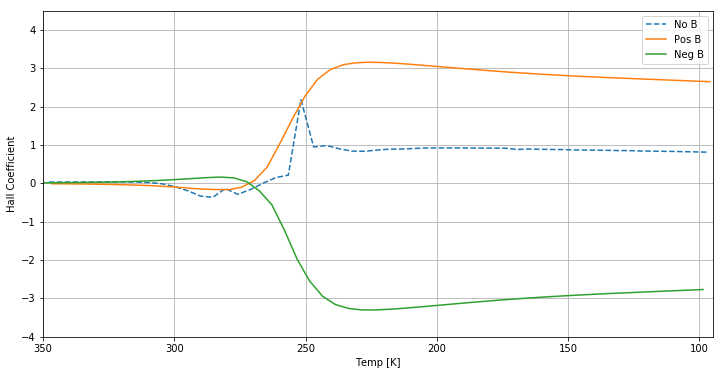

ff [274.3  279.05 283.85 288.65 293.4  298.2  303.   307.85 312.7  317.55
 322.4  327.25 332.1  336.95 341.75 346.6 ]
50


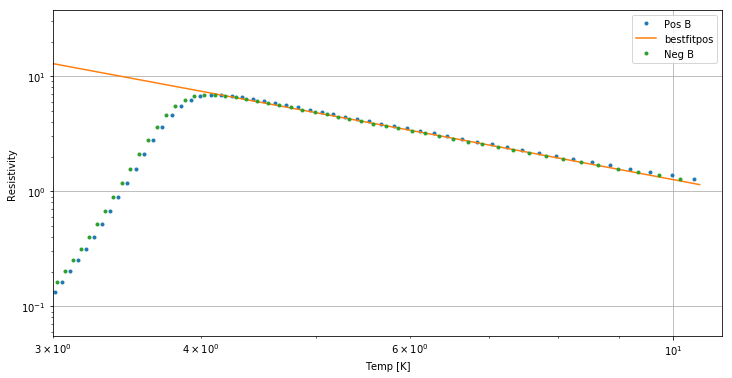

[ 96.015 100.285 104.515 108.78  113.005 117.17  121.375 125.535 129.635
 133.96  138.065 142.235 146.37  150.715 154.955 159.15  163.465 167.745
 172.05  176.35  180.48  184.75  189.03  193.305 197.565 202.3   207.05
 211.8   216.55  221.25  225.95  230.75  235.5   240.45  245.4   250.25
 255.05  259.8   264.6   269.4   274.3   279.05  283.85  288.65  293.4
 298.2   303.    307.85  312.7   317.55  322.4   327.25  332.1   336.95
 341.75  346.6  ]
The Hall Mobility at low temperatures for Positive B field is: 1.044897212220488
The Hall Mobility at low temperatures for Positive B field is: 1.189059476727664
[1.27573829 1.37076758 1.46820092 1.57076984 1.67883739 1.78909724
 1.9057752  2.02584007 2.14978393 2.2840025  2.41773261 2.55777769
 2.70186802 2.85883548 3.01804008 3.17613469 3.34299135 3.5124169
 3.68971588 3.87687571 4.06037358 4.25638252 4.45501375 4.66234383
 4.86728999 5.10237671 5.3470261  5.58878436 5.83321933 6.07691781
 6.31107655 6.53177124 6.71611809 6.84322304 6.857655

/Users/yizelvizcarra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


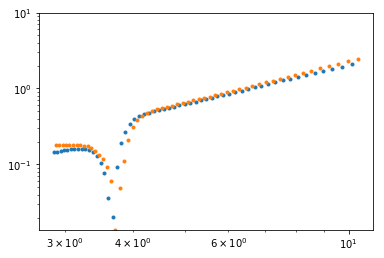

In [136]:


vac,vbd = np.asarray(df['Voltage -AC']),np.asarray(df['Voltage -BD'])
cbd,cac = np.asarray(df['sample current -BD']), np.asarray(df['sample current -AC'] )
vcd,vbc = np.asarray(df['Voltage -CD']),np.asarray(df['Voltage -BC'])
cab,cad = np.asarray(df['sample current -AB']), np.asarray(df['sample current -AD'] )

B = np.asarray(df['B-Field (Gauss)']) * 1e-4
T = np.asarray(df['Temperature (K)'])


noB = (B[1:168:3])
posB = (B[0:168:3])
negB = (-1*B[2:168:3])


vac_noB = (vac[1:168:3])
vac_posB = (vac[0:168:3])
vac_negB = (vac[2:168:3])




vbd_noB = (vbd[1:168:3])
vbd_posB = (vbd[0:168:3])
vbd_negB = (vbd[2:168:3])



cac_noB = (cac[1:168:3])
cac_posB = (cac[0:168:3])
cac_negB = (cac[2:168:3])


cbd_noB = (cbd[1:168:3])
cbd_posB = (cbd[0:168:3])
cbd_negB = (cbd[2:168:3])


T_noB = (T[1:168:3])
T_posB = (T[0:168:3])
T_negB = (T[2:168:3])



negB


T_extrinsic_pos

posB



def d(v1,i1,v2,i2,B):
    racbd = (v1/i1)
    rbdac = (v2/i2)
    trans_r = ((racbd+rbdac)/2)
    coeff = (trans_r)*(1.25e-3/B)
    return coeff
plt.figure(figsize=[12,6])
hallc_noB = d(vac_noB,cbd_noB,vbd_noB,cac_noB, noB)
      
T_extrinsic_pos = np.array(T_posB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)>0])
T_intrinsic_pos = np.array(T_posB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)<0])
T_extrinsic_neg = np.array(T_negB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)>0])
T_intrinsic_neg = np.array(T_negB[d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)<0])

print('T_extrinsic_pos',T_extrinsic_pos[-1])       
print('T_intrinsic_pos',T_intrinsic_pos[0])

print('T_extrinsic_neg',T_extrinsic_neg[-1])
print('T_intrinsic_neg',T_intrinsic_neg[0])

inversionpoint_posB = (T_intrinsic_pos[-1]+T_extrinsic_pos[0])/2
inversionpoint_negB = (T_intrinsic_neg[-1]+T_extrinsic_neg[0])/2

plt.plot(T_noB,hallc_noB,'--',label = 'No B')

hallc_posB = d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB)
plt.plot(T_posB,hallc_posB,'-',label = 'Pos B')
hallc_negB = d(vac_negB,cbd_negB,vbd_negB,cac_negB, negB)





plt.plot(T_negB,hallc_negB,'-',label = 'Neg B')
plt.legend()
plt.xlabel('Temp [K]')
plt.ylabel('Hall Coefficient')
plt.xlim(350,95)
plt.ylim(-4,4.5)
plt.grid()
plt.show()
print('ff',T_intrinsic_pos)

def resistivity(v1,i1,v2,i2,B):
    const = np.pi*1.25e-3/np.log(2)
    racbd = (v1/i1)
    rbdac = (v2/i2)
    x = rbdac/racbd
    f = 1/np.cosh(np.log(abs(x)/2.403))
    trans_r = ((racbd+rbdac)/2)
    coeff = (trans_r)*(const)*f
    return coeff
plt.figure(figsize=[12,6])

resistivity_noB = resistivity(vcd_noB,cab_noB,vbc_noB,cad_noB, noB)
      

#plt.plot(T_noB,resistivity_noB,'v',label = 'No B')

resistivity_posB = resistivity(vcd_posB,cab_posB,vbc_posB,cad_posB, posB)
plt.plot(1000/T_posB,resistivity_posB,'.',label = 'Pos B')
#plt.yscale('log')
#plt.xscale('log')

resistivity_negB = resistivity(vcd_negB,cab_negB,vbc_negB,cad_negB, negB)
b = T_negB[0:34]
t = resistivity_posB[0:34]

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c
target_func = func_powerlaw


popt, pcov = curve_fit(target_func, b, t,maxfev=1000000 )


b = np.linspace(95,500)
plt.plot(1000/b, target_func(b, *popt), '-',label = 'bestfitpos')
print(len(b))
plt.yscale('log')


plt.xscale('log')


plt.plot(1000/T_negB,resistivity_posB,'.',label = 'Neg B')
plt.legend()
plt.xlabel('Temp [K]')
plt.ylabel('Resistivity')
plt.grid()
plt.xlim(3,11)
plt.show()
max_resisitivity = np.max(resistivity_posB)
print(T_posB)


#T_extrinsic_pos = np.array(T_negB[max_resisitivity>jj])

#d(vac_posB,cbd_posB,vbd_posB,cac_posB, posB) hall coeff
#T_intrinsic_neg
tem = T_posB
resistiv = resistivity_posB
b = (T_posB[0:34])
t = (resistivity_posB[0:34])

#b = (T_negB[0:34])
#t = (jjj[0:34])
#plt.plot(1000/b,t)


#next

noB = (B[1:168:3])
posB = (B[0:168:3])
negB = (B[2:168:3])


vcd_noB = (vcd[1:168:3])
vcd_posB = (vcd[0:168:3])
vcd_negB = (vcd[2:168:3])


vbc_noB = (vbc[1:168:3])
vbc_posB = (vbc[0:168:3])
vbc_negB = (vbc[2:168:3])




cad_noB = (cad[1:168:3])
cad_posB = (cad[0:168:3])
cad_negB = (cad[2:168:3])


cab_noB = (cab[1:168:3])
cab_posB = (cab[0:168:3])
cab_negB = (cab[2:168:3])


T_noB = (T[1:168:3])
T_posB = (T[0:168:3])
T_negB = (T[2:168:3])

mobility_noB = hallc_noB/resistivity_noB
mobility_posB = hallc_posB/resistivity_posB
mobility_negB = hallc_negB/resistivity_negB


hallmobility_neg =-1*mobility_negB[(T_negB < inversionpoint_negB)&(~np.isnan(mobility_negB)) ]
np.mean(hallmobility_neg)


hallmobility_pos =mobility_posB[(T_posB < inversionpoint_posB)&(~np.isnan(mobility_posB)) ]
print("The Hall Mobility at low temperatures for Positive B field is:",np.mean(hallmobility_pos))
print("The Hall Mobility at low temperatures for Positive B field is:",np.mean(hallmobility_neg))
h = hallc_noB/resistivity_noB
h1 = hallc_posB/resistivity_posB
h2 = hallc_negB/resistivity_negB
plt.plot(1000/T_negB,abs(h1),'.')
plt.plot(1000/T_posB,abs(h2),'.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(-10,10)
print(resistivity_posB)


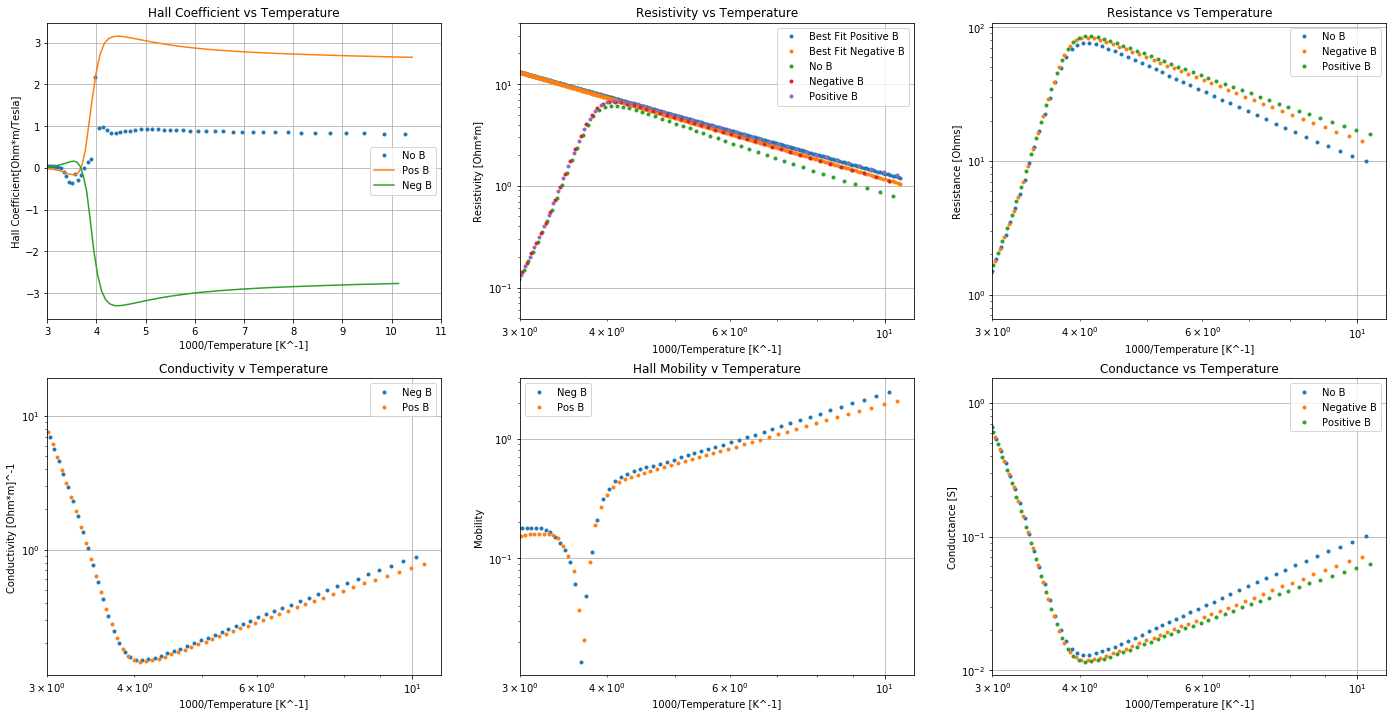

RH at Room temp of 295K with Positive B is: -0.11900993578301627
RH at Room temp of 295K with Negative B is: 0.12040838387925785
Resistivity at Room temp of 295K with Positive B is: 1.0167287151304154
Resistivity at Room temp of 295K with Negative B is: 1.0105229737086434
The Hall Coefficient is 0  for a Negative B field at: 224.1175
The Hall Coefficient is 0  for a Positive B field at: 221.3075
The Hall Mobility at low temperatures for Positive B field is: 1.044897212220488
The Hall Mobility at low temperatures for Negative B field is: 1.189059476727664


In [137]:

b_neg =T_negB[0:34]
t_neg = resistivity_negB[0:34]

b_pos =T_posB[0:34]
t_pos = resistivity_posB[0:34]
b_no =T_noB[0:34]
t_no = resistivity_noB[0:34]



def func_powerlaw(x, m, c):
    return x**m * c

target_func = func_powerlaw

popt_neg, pcov = curve_fit(target_func, b_neg, t_neg,maxfev=1000000 )
popt_pos, pcov = curve_fit(target_func, b_pos, t_pos,maxfev=1000000 )
popt_no, pcov = curve_fit(target_func, b_no, t_no,maxfev=1000000 )

trange = np.linspace(95,500,500)


fig, axs = plt.subplots(2, 3,figsize=(24,12))





axs[0, 0].plot(1000/T_noB,hallc_noB,'.',label = 'No B')
axs[0, 0].plot(1000/T_posB,hallc_posB,'-',label = 'Pos B')
axs[0, 0].plot(1000/T_negB,hallc_negB,'-',label = 'Neg B')
axs[0, 0].set_title('Hall Coefficient vs Temperature')
axs[0, 0].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Hall Coefficient[Ohm*m/Tesla]',xlim =(3,11))
axs[0, 0].legend()
axs[0, 0].grid()



axs[0, 1].plot(1000/trange, target_func(trange, *popt_pos), '.',label = 'Best Fit Positive B')
axs[0, 1].plot(1000/trange, target_func(trange, *popt_neg), '.',label = 'Best Fit Negative B')
axs[0, 1].plot(1000/T_noB,resistivity_noB,'.',label = 'No B')
axs[0, 1].plot(1000/T_negB,resistivity_negB,'.',label = 'Negative B')
axs[0, 1].plot(1000/T_posB,resistivity_posB,'.',label = 'Positive B')
axs[0, 1].set_title('Resistivity vs Temperature')
axs[0, 1].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Resistivity [Ohm*m]',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[0, 1].legend()
axs[0, 1].grid()


axs[1, 0].plot((1000/T_negB),1/resistivity_negB,'.',label = 'Neg B')
axs[1, 0].plot((1000/T_posB),1/resistivity_posB,'.',label = 'Pos B') 
axs[1, 0].set_title('Conductivity v Temperature')
axs[1, 0].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Conductivity [Ohm*m]^-1',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(1000/T_negB,abs(mobility_negB),'.',label = 'Neg B')
axs[1, 1].plot(1000/T_posB,abs(mobility_posB),'.',label = 'Pos B')
axs[1, 1].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Mobility',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_title('Hall Mobility v Temperature')




axs[0, 2].plot(1000/T_noB,resistivity_noB*.00125/.0001,'.',label = 'No B')
axs[0, 2].plot(1000/T_negB,resistivity_negB*.00125/.0001,'.',label = 'Negative B')
axs[0, 2].plot(1000/T_posB,resistivity_posB*.00125/.0001,'.',label = 'Positive B')
axs[0, 2].set_title('Resistance vs Temperature')
axs[0, 2].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Resistance [Ohms]',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[0, 2].legend()
axs[0, 2].grid()


axs[1, 2].plot(1000/T_noB,1/(resistivity_noB*.00125/.0001),'.',label = 'No B')
axs[1, 2].plot(1000/T_negB,1/(resistivity_negB*.00125/.0001),'.',label = 'Negative B')
axs[1, 2].plot(1000/T_posB,1/(resistivity_posB*.00125/.0001),'.',label = 'Positive B')
axs[1, 2].set_title('Conductance vs Temperature')
axs[1, 2].set(xlabel= '1000/Temperature [K^-1]' ,ylabel='Conductance [S]',yscale = 'log',xscale = 'log',xlim =(3,11))
axs[1, 2].legend()
axs[1, 2].grid()

plt.show()


rh_hot_posB =hallc_posB[(T_posB > 295)&(~np.isnan(hallc_posB)) ]
rh_cold_posB =hallc_posB[(T_posB < 295)&(~np.isnan(hallc_posB)) ]
rh_room_posB =.5*(rh_hot_posB[0]+rh_cold_posB[-1])
print("RH at Room temp of 295K with Positive B is:",rh_room_posB )


rh_hot_negB =hallc_negB[(T_negB > 295)&(~np.isnan(hallc_negB)) ]
rh_cold_negB =hallc_negB[(T_negB < 295)&(~np.isnan(hallc_negB)) ]
rh_room_negB =.5*(rh_hot_negB[0]+rh_cold_negB[-1])
print("RH at Room temp of 295K with Negative B is:",rh_room_negB )



yy_posB = np.asarray(np.log10(abs(target_func(trange, *popt_pos))))
xx= np.asarray(trange)
resistivity_hot_posB =yy_posB[(xx > 295)&(~np.isnan(yy_posB)) ]
resistivity_cold_posB =yy_posB[(xx < 295)&(~np.isnan(yy_posB)) ]
resistivity_room_posB =.5*(resistivity_hot_posB[0]+resistivity_cold_posB[-1])
print("Resistivity at Room temp of 295K with Positive B is:",resistivity_room_posB )


yy_negB = np.asarray(np.log10(abs(target_func(trange, *popt_neg))))
xx= np.asarray(trange)
resistivity_hot_negB =yy_negB[(xx > 295)&(~np.isnan(yy_negB)) ]
resistivity_cold_negB =yy_negB[(xx < 295)&(~np.isnan(yy_negB)) ]
resistivity_room_negB =.5*(resistivity_hot_negB[0]+resistivity_cold_negB[-1])
print("Resistivity at Room temp of 295K with Negative B is:",resistivity_room_negB )

print("The Hall Coefficient is 0  for a Negative B field at:",inversionpoint_negB)
print("The Hall Coefficient is 0  for a Positive B field at:",inversionpoint_posB)


mobility_noB = hallc_noB/resistivity_noB
mobility_posB = hallc_posB/resistivity_posB
mobility_negB = hallc_negB/resistivity_negB


hallmobility_neg =-1*mobility_negB[(T_negB < inversionpoint_negB)&(~np.isnan(mobility_negB)) ]
np.mean(hallmobility_neg)


hallmobility_pos =mobility_posB[(T_posB < inversionpoint_posB)&(~np.isnan(mobility_posB)) ]
print("The Hall Mobility at low temperatures for Positive B field is:",np.mean(hallmobility_pos))
print("The Hall Mobility at low temperatures for Negative B field is:",np.mean(hallmobility_neg))



In [138]:
RH_roomtemp


[-0.11553600602294853, 0.10884575558696033]

In [139]:
RH_roomtemp.append(rh_room_posB)
RH_roomtemp.append(rh_room_negB)

Resistivity_roomtemp.append(resistivity_room_posB)
Resistivity_roomtemp.append(resistivity_room_negB)

zero_hallcoeff.append(inversionpoint_negB)
zero_hallcoeff.append(inversionpoint_posB)


hall_mobility.append(hallmobility_pos)
hall_mobility.append(hallmobility_neg)

In [140]:
print('RH_roomtemp:',np.mean(RH_roomtemp),np.std(RH_roomtemp))
print('Resistivity_roomtemp:',np.mean(Resistivity_roomtemp),np.std(Resistivity_roomtemp))
print('zero_hallcoeff:',np.mean(zero_hallcoeff),np.std(zero_hallcoeff))
hallmob= [np.mean(i) for i in hall_mobility]
print('hallmob:',np.mean(hallmob),np.std(hallmob))
print('9um')

RH_roomtemp: -0.0013229505849366545 0.1160285634310823
Resistivity_roomtemp: 1.0136258444195294 0.0031028707108859965
zero_hallcoeff: 222.7125 1.4050000000000011
hallmob: 1.1163537553333345 0.07219481411505287
9um


In [141]:
print('hallmob:',np.mean(hallmob),np.std(hallmob))
print('9u')

hallmob: 1.1163537553333345 0.07219481411505287
9u


In [142]:
nb = [122.01,121.99,121.80,121.99,122.40]
pb = [4164.92,4164.89,4164.96,4161.125,4084.875]
negb = [-3970.357,-3970.142,-3967.286,-3966.91,-3748]


nbs = [.12,.15,.11,.13,25.30]
pbs = [3.58,2.96,4.996,5.38,550.83]
negbs = [4.89,4.01,4.99,6.142,1183.37]

df = pd.DataFrame([nb,nbs,pb,pbs,negb,negbs],index=['No B Field', 'No B Field STD','Pos B Field','Pos B Field STD','Neg B Field', 'Neg B Field STD'],columns =['1uA','225 uA','450 uA','675 uA','900 uA'])









In [143]:
hallroomtemp = [-.766,-.023,.0028,-.001,.0005]
hallroomtempsd= [.119,.087,.1148,.116,.1164]

resistivityroomtemp = [-8.03,1.01,1.008,1.0136,.9558]
resistivityroomtempsd = [.167,.007,.0041,.0031,.004]

zerohall = [223.74,222.989,222.971,222.71,221.727875]
zerohallsd = [1.41,1.401,1.411,1.48,1.3937]

hallmobility = [2.404,1.310,1.1175,1.116,.9360]
hallmobilitysd = [2.404,0.1975,0.624,0.072,0.044]

In [144]:
df = pd.DataFrame([hallroomtemp,hallroomtempsd,resistivityroomtemp,resistivityroomtempsd,zerohall,zerohallsd,hallmobility,hallmobilitysd],index=['Hall Coefficient Room Temp','Hall Coefficient Room Temp STD','Resistivity Room Temp','Resistivity Room Temp STD','Hall Coefficient is Zero at Temp','Zero Hall Coefficient STD','Hall Mobility','Hall Mobility STD' ],columns =['1uA','225 uA','450 uA','675 uA','900 uA'])


In [145]:
df

,1uA,225 uA,450 uA,675 uA,900 uA
Hall Coefficient Room Temp,-0.766,-0.0230,0.0028,-0.0010,0.000500
Hall Coefficient Room Temp STD,0.119,0.0870,0.1148,0.1160,0.116400
Resistivity Room Temp,-8.030,1.0100,1.0080,1.0136,0.955800
Resistivity Room Temp STD,0.167,0.0070,0.0041,0.0031,0.004000
Hall Coefficient is Zero at Temp,223.740,222.9890,222.9710,222.7100,221.727875
Zero Hall Coefficient STD,1.410,1.4010,1.4110,1.4800,1.393700
Hall Mobility,2.404,1.3100,1.1175,1.1160,0.936000
Hall Mobility STD,2.404,0.1975,0.6240,0.0720,0.044000
